In [30]:
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("data/train.csv")
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

Data Fields

- __PetID__ - Unique hash ID of pet profile
- __AdoptionSpeed__ - Categorical speed of adoption. Lower is faster. This is the value to predict. 
    - 0 - Pet was adopted on the same day as it was listed.
    - 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
    - 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
    - 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
    - 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). 
- __Type__ - Type of animal (1 = Dog, 2 = Cat)
- __Name__ - Name of pet (Empty if not named)
- __Age__ - Age of pet when listed, in months
- __Breed1__ - Primary breed of pet (Refer to BreedLabels dictionary)
- __Breed2__ - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- __Gender__ - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- __Color1__ - Color 1 of pet (Refer to ColorLabels dictionary)
- __Color2__ - Color 2 of pet (Refer to ColorLabels dictionary)
- __Color3__ - Color 3 of pet (Refer to ColorLabels dictionary)
- __MaturitySize__ - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- __FurLength__ - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- __Vaccinated__ - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- __Dewormed__ - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- __Sterilized__ - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- __Health__ - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- __Quantity__ - Number of pets represented in profile
- __Fee__ - Adoption fee (0 = Free)
- __State__ - State location in Malaysia (Refer to StateLabels dictionary)
- __RescuerID__ - Unique hash ID of rescuer
- __VideoAmt__ - Total uploaded videos for this pet
- __PhotoAmt__ - Total uploaded photos for this pet
- __Description__ - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.


In [33]:
categorical_columns = ["Type", "Gender", "MaturitySize", "FurLength", "Vaccinated", "Dewormed", "Sterilized", "Health"]
numeric_columns = [col for col in df.columns 
                   if col not in categorical_columns 
                   and 
                   all([word not in col.lower() for word in ["breed", "color", "state"]])]
target = "AdoptionSpeed"

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.isnull().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

Pets with no name

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


array([[<Axes: title={'center': 'AdoptionSpeed'}>,
        <Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'MaturitySize'}>,
        <Axes: title={'center': 'FurLength'}>,
        <Axes: title={'center': 'Vaccinated'}>],
       [<Axes: title={'center': 'Dewormed'}>,
        <Axes: title={'center': 'Sterilized'}>,
        <Axes: title={'center': 'Health'}>]], dtype=object)

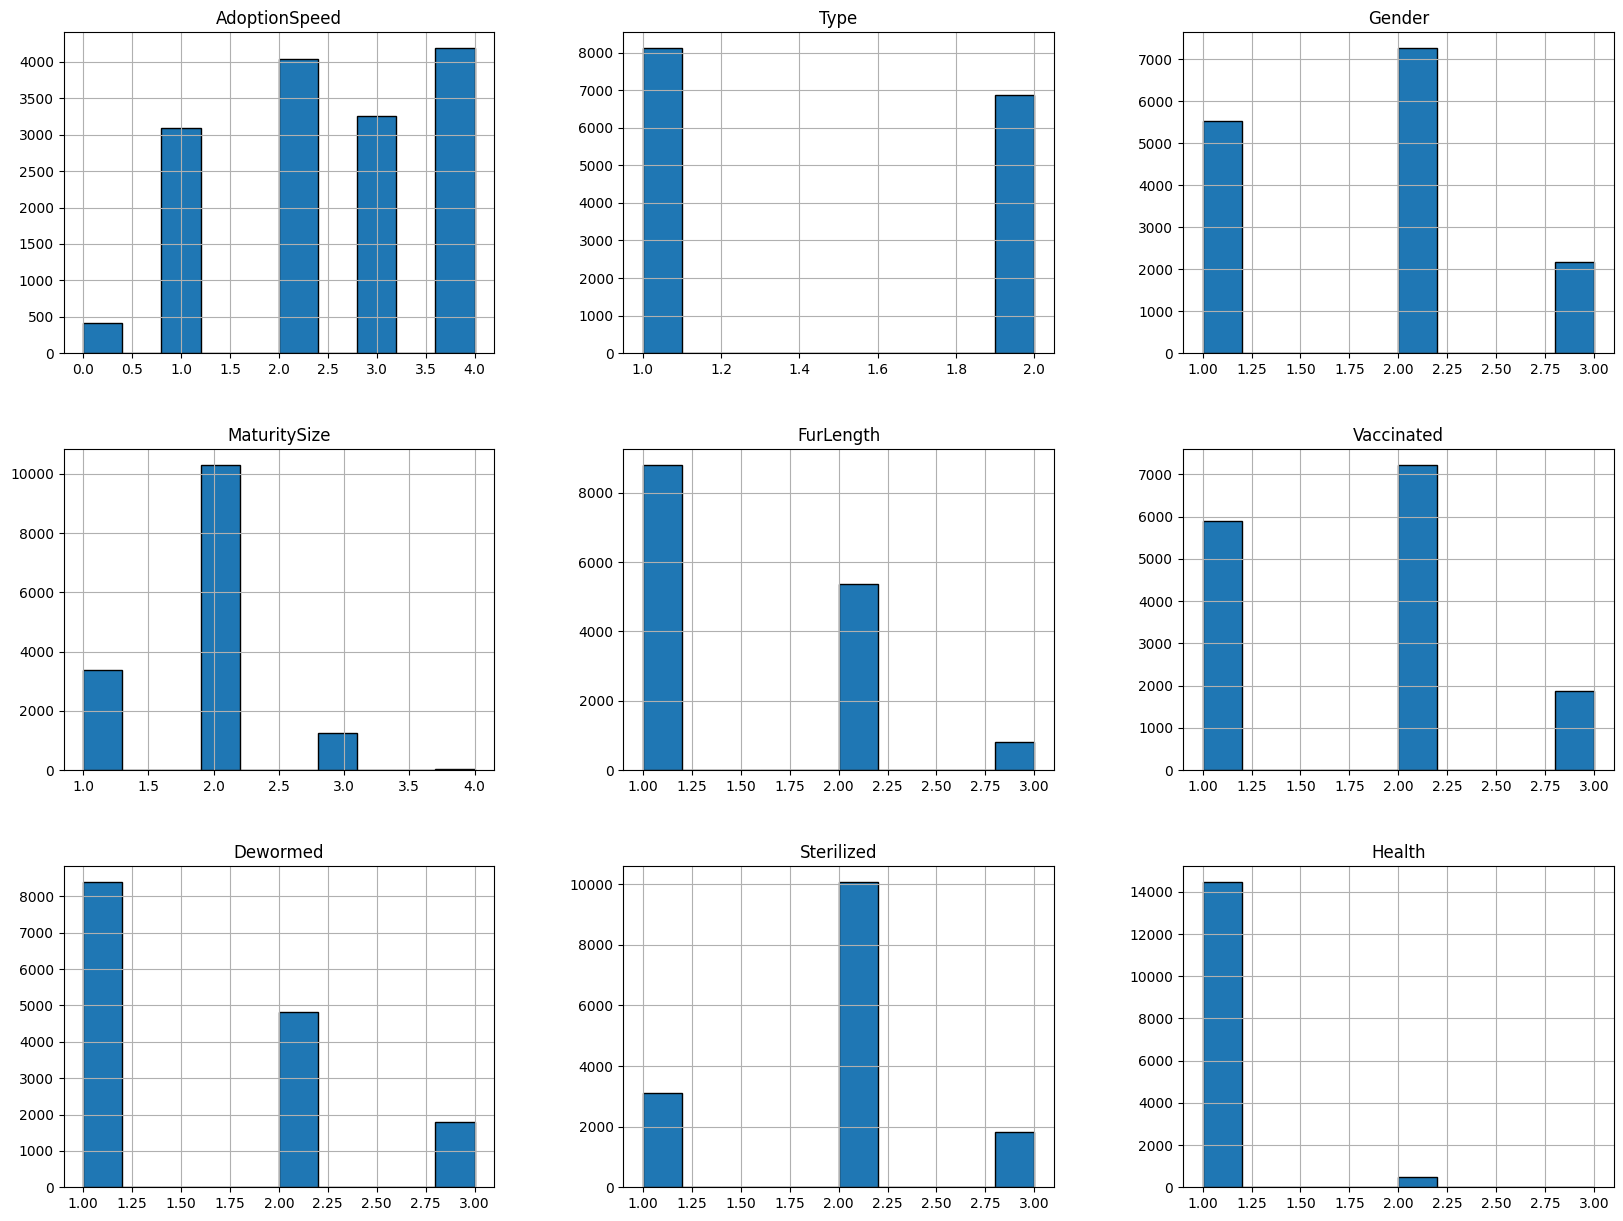

In [37]:
df.hist(column=[target] + categorical_columns, figsize=(20, 15), edgecolor="black", bins=10)

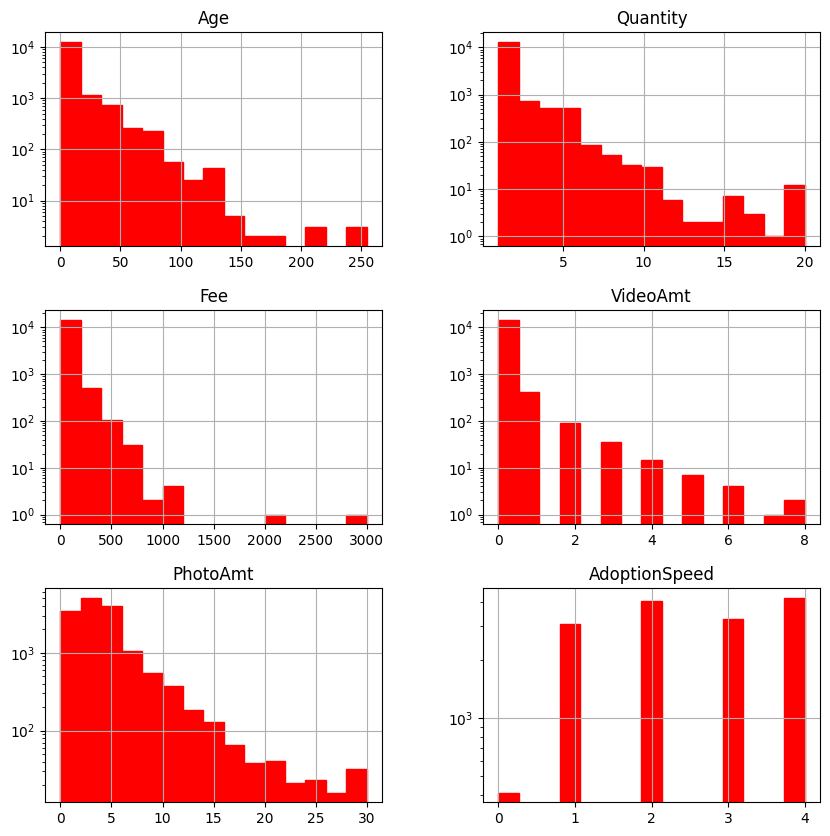

In [38]:
axes = df.hist(column=numeric_columns, bins=15, figsize=(10, 10), edgecolor="red", color="red",)
for ax in axes.flatten():
    ax.set_yscale('log') 

In [39]:
df["Age_years"] = df["Age"]//12

Bin 1:   90.82905355832722
Bin 2:   5.2291069165610615
Bin 3:   2.321083172147002
Bin 4:   1.0671646768491962
Bin 5:   0.3935169745881411
Bin 6:   0.09337690922430468
Bin 7:   0.013339558460614954
Bin 8:   0.013339558460614954
Bin 9:   0.02000933769092243
Bin 10:   0.02000933769092243


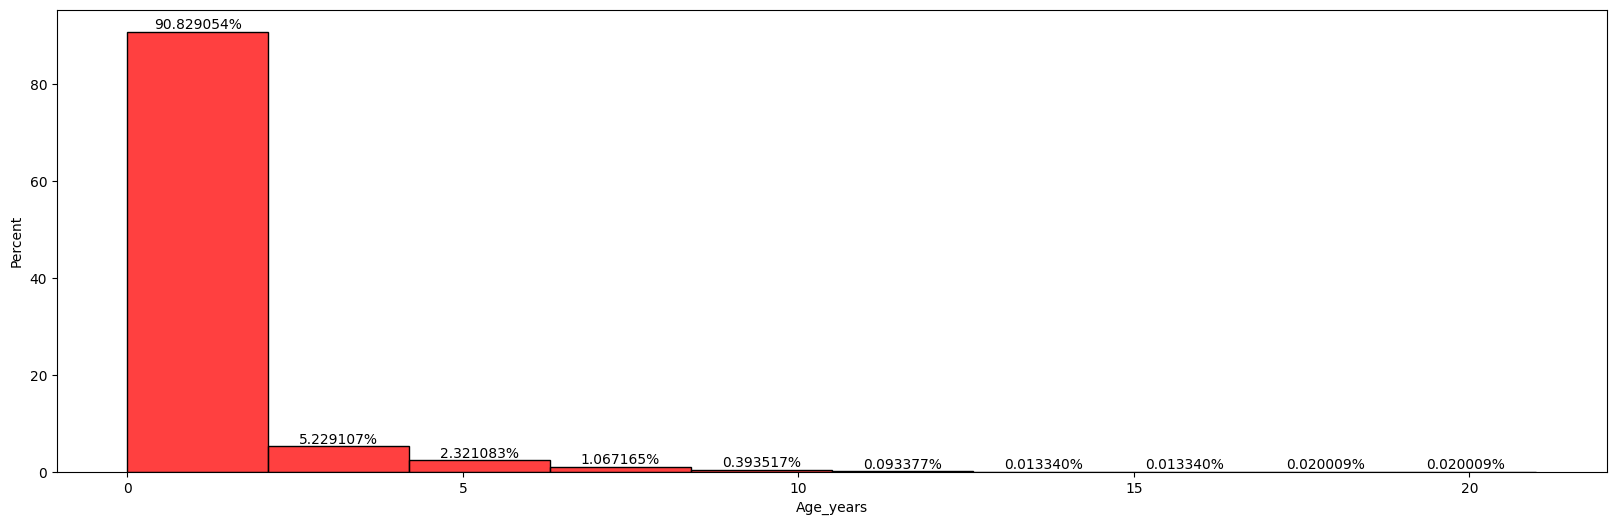

In [40]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(df["Age_years"], log_scale=(False, False), color="red", stat="percent", bins=10)

# Add percentage labels on top of each bar
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    if height > 0:
        print("Bin " + str(i+1) + ":   " + str(height))
        ax.text(patch.get_x() + patch.get_width() / 2, height, f"{height:.6f}%", 
                ha='center', va='bottom')

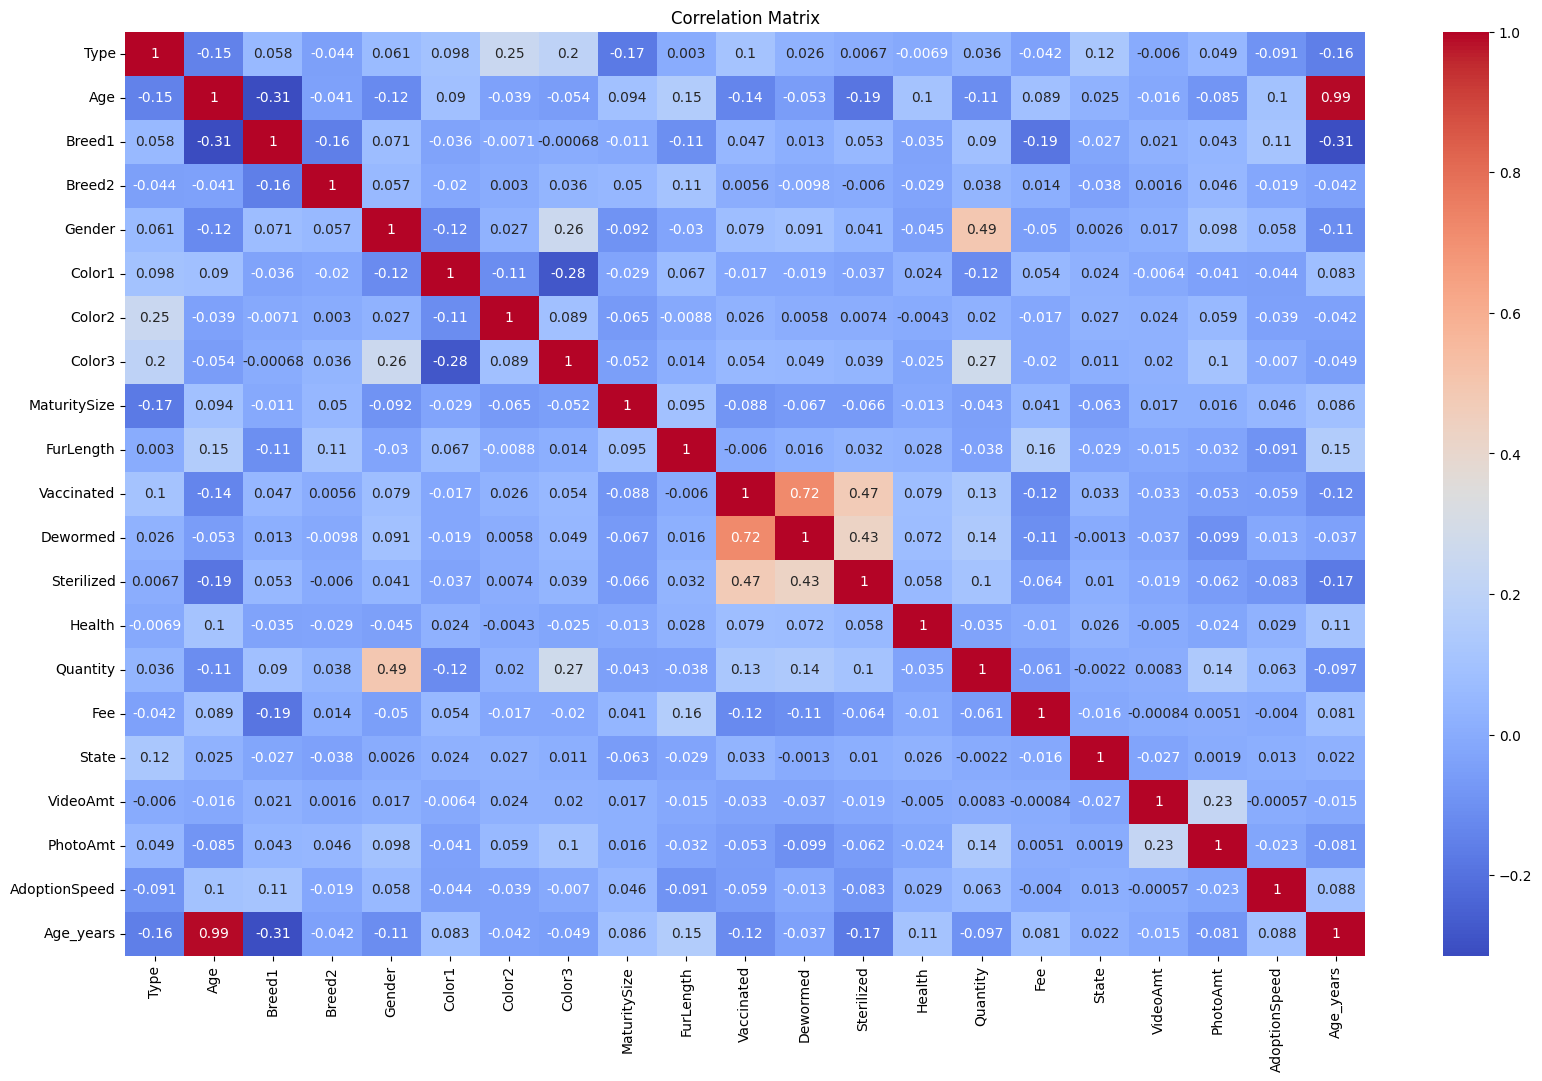

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\MSO2CLJ\AppData\Local\Temp\ipykernel_2372\3708632835.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='AdoptionSpeed', y='Age', data=df, estimator='mean', ci='sd')


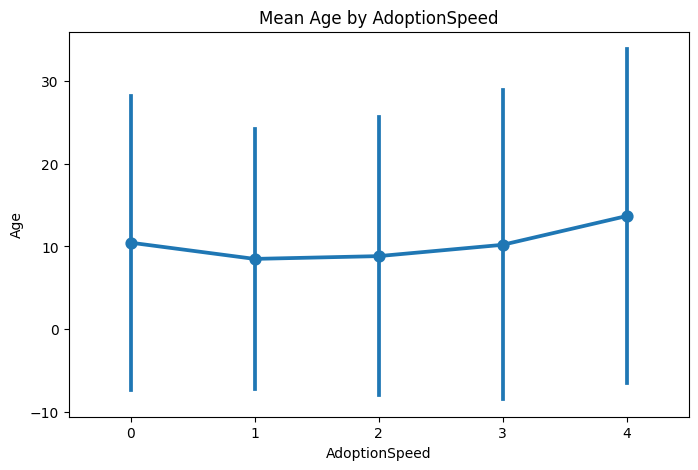

In [ ]:
plt.figure(figsize=(8,5))
sns.pointplot(x='AdoptionSpeed', y='Age', data=df, estimator='mean', ci='sd')
plt.title("Mean Age by AdoptionSpeed")
plt.show()

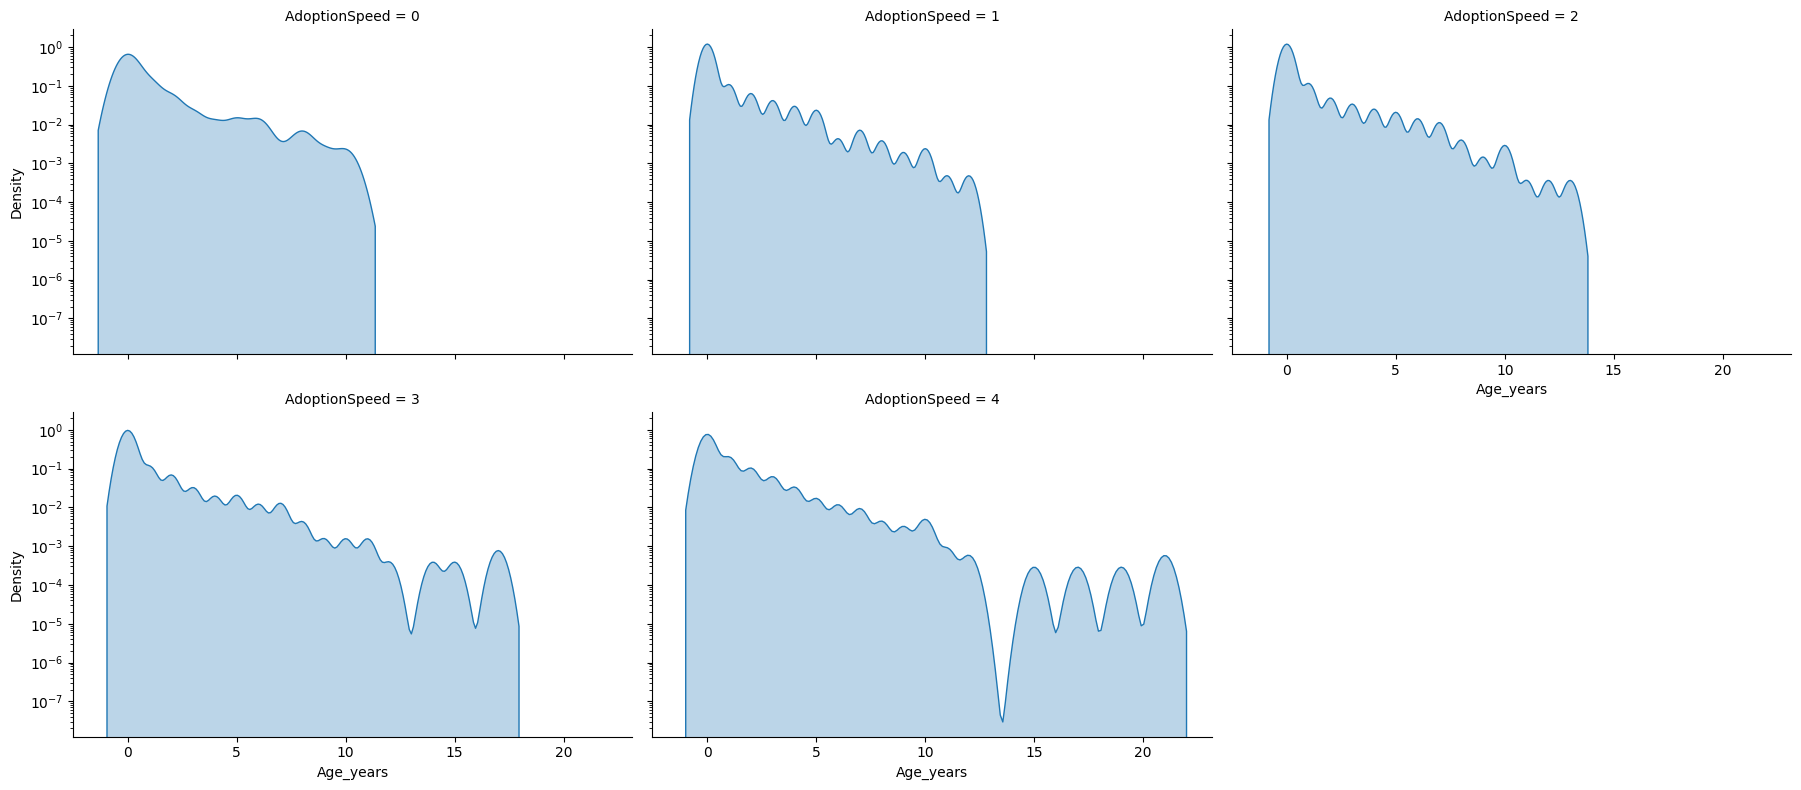

In [61]:
g = sns.FacetGrid(df, col="AdoptionSpeed", col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.kdeplot, x="Age_years", fill=True, alpha=0.3)
g.set_titles(col_template="AdoptionSpeed = {col_name}")
plt.yscale("log")
plt.show()

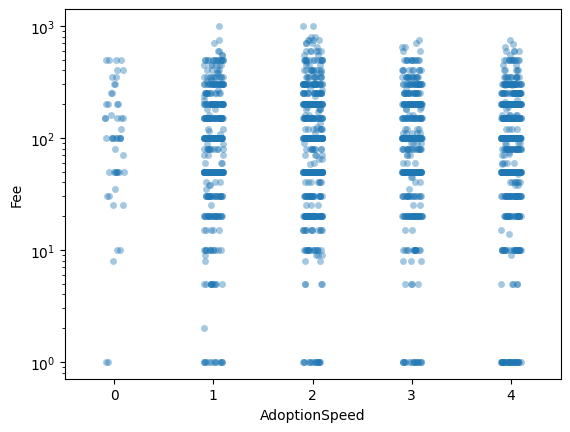

In [43]:
df_without_extreme_fee_outliers = df.loc[df["Fee"].sort_values(ascending=False)[3:].index]
sns.stripplot(x='AdoptionSpeed', y='Fee', data=df_without_extreme_fee_outliers, jitter=True,alpha=0.4)
plt.yscale('log')
plt.show()

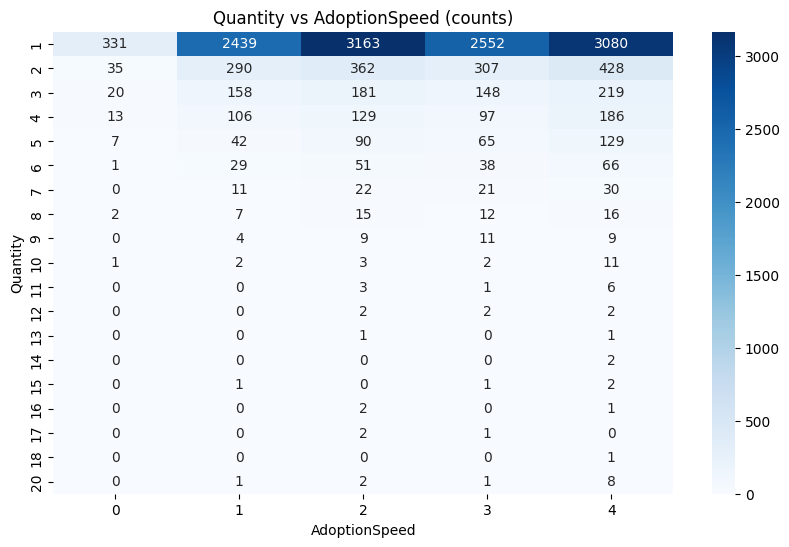

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create count matrix
ct = pd.crosstab(df['Quantity'], df['AdoptionSpeed'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Quantity vs AdoptionSpeed (counts)")
plt.xlabel("AdoptionSpeed")
plt.ylabel("Quantity")
plt.show()

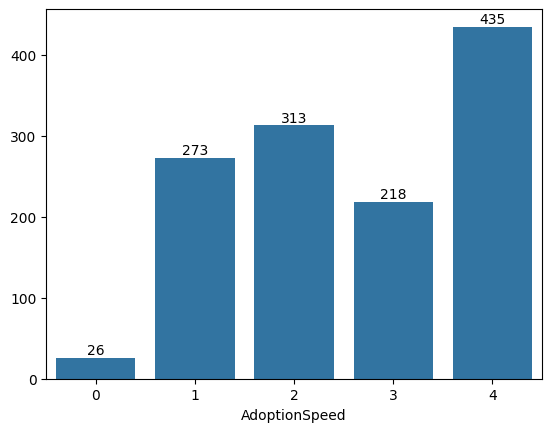

In [ ]:
no_name_pets = df[df["Name"].isnull()]
counts = no_name_pets[target].value_counts().sort_index()

sns.barplot(x=counts.index, y=counts.values)
for i, val in enumerate(counts.values):
    plt.text(i, val + 1, str(val), ha='center', va="bottom")

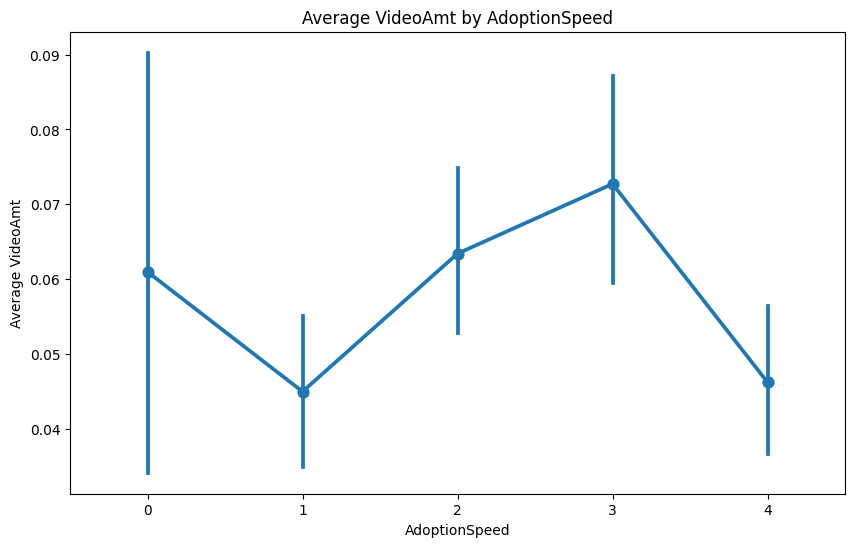

In [92]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='AdoptionSpeed', y='VideoAmt')
plt.title("Average VideoAmt by AdoptionSpeed")
plt.xlabel("AdoptionSpeed")
plt.ylabel("Average VideoAmt")
plt.show()

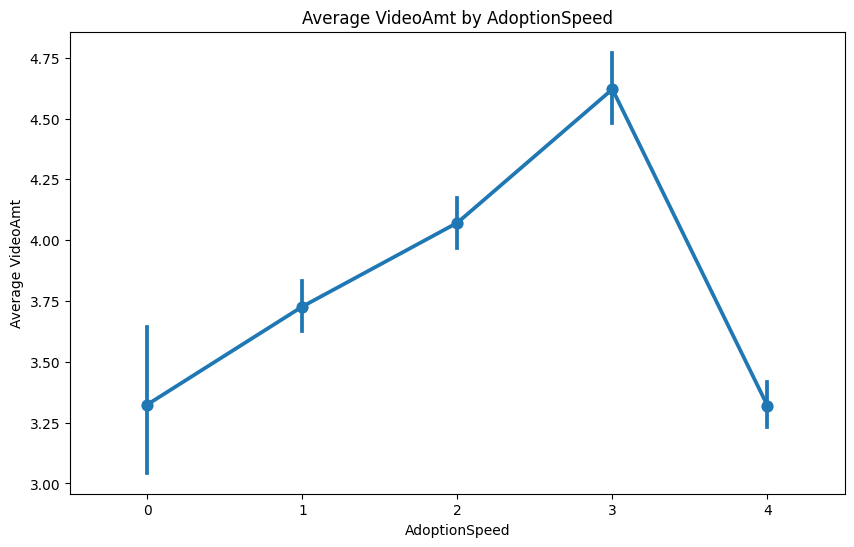

In [93]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='AdoptionSpeed', y='PhotoAmt')
plt.title("Average VideoAmt by AdoptionSpeed")
plt.xlabel("AdoptionSpeed")
plt.ylabel("Average VideoAmt")
plt.show()

14325
351975
25


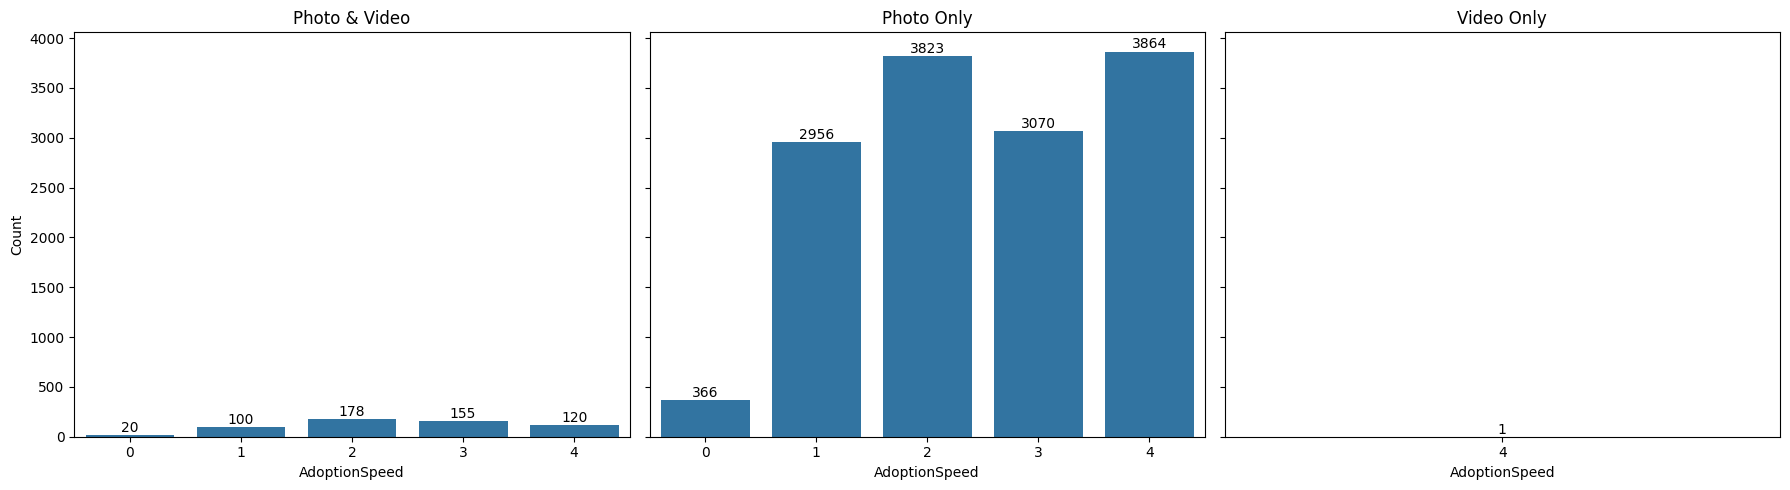

In [109]:
photo_and_video = df[(df["VideoAmt"] > 0) & (df["PhotoAmt"] > 0)]
photo_only = df[(df["VideoAmt"] == 0) & (df["PhotoAmt"] > 0)]
video_only = df[(df["VideoAmt"] > 0) & (df["PhotoAmt"] == 0)]

print(photo_and_video.size)
print(photo_only.size)
print(video_only.size)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for title, ax, data in zip(
    ("Photo & Video", "Photo Only", "Video Only"),
    axes,
    (photo_and_video, photo_only, video_only)):
    
    counts = data[target].value_counts().sort_index()
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(target)
    ax.set_ylabel('Count')
    
    for i, val in enumerate(counts.values):
        ax.text(i, val + 1, str(val), ha='center', va="bottom")

plt.tight_layout()
plt.show()
